In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("survey_responses.csv")

# Remove whitespace from column names
df.columns = df.columns.str.strip()

df = df.drop(columns=['Timestamp'])

# Rename columns
question_texts = {f"Q{i+1}": col for i, col in enumerate(df.columns)}
df.columns = list(question_texts.keys())



In [62]:
question_types = {
    "Q1": "multiple choice",
    "Q2": "multiple choice",
    "Q3": "multiple choice",
    "Q4": "short answer",
    "Q5": "short answer",
    "Q6": "multiple choice",
    "Q7": "likert scale",
    "Q8": "checkbox",
    "Q9": "likert scale",
    "Q10": "checkbox",
    "Q11": "likert scale",
    "Q12": "likert scale",
    "Q13": "checkbox",
    "Q14": "multiple choice",
    "Q15": "multiple choice",
    "Q16": "checkbox",
    "Q17": "checkbox",
    "Q18": "likert scale",
    "Q19": "multiple choice",
    "Q20": "checkbox",
    "Q21": "open-ended",
    "Q22": "checkbox",
    "Q23": "multiple choice",
    "Q24": "likert scale",
    "Q25": "multiple choice",
    "Q26": "open-ended",
    "Q27": "multiple choice",
    "Q28": "multiple choice",
    "Q29": "multiple choice",
    "Q30": "multiple choice",
    "Q31": "multiple choice",
    "Q32": "likert scale",
    "Q33": "checkbox",
    "Q34": "likert scale",
    "Q35": "checkbox",
    "Q36": "open-ended",
    "Q37": "open-ended",
    "Q38": "open-ended"
}

# Table
rows = []
for q, text in question_texts.items():
    rows.append({
        "Q": q,
        "Type": question_types.get(q),
        "Text": text
    })

# Create DF
questions_df = pd.DataFrame(rows)
questions_df


,Q,Type,Text
0,Q1,multiple choice,What is your age?
1,Q2,multiple choice,What is your gender?
2,Q3,multiple choice,What is your current level of study?
3,Q4,short answer,What is your field of study?
4,Q5,short answer,Which country are you currently living in?
5,Q6,multiple choice,Do you currently follow any dietary preference...
6,Q7,likert scale,"During periods of academic stress, how often d..."
7,Q8,checkbox,What changes do you typically notice in your e...
8,Q9,likert scale,How difficult is it for you to maintain health...
9,Q10,checkbox,Which of the following factors most influence ...


In [63]:
# Map official option to relevant questions

official_options_map = {
    # multiple choice options
    "Q6": [
        "None / I eat everything",
        "Vegetarian",
        "Vegan",
        "Halal",
        "Kosher",
        "Gluten-free",
        "Lactose-free",
        "Allergies or intolerances"
    ],
    "Q14": [
        "Yes, significantly",
        "Yes",
        "Only a bit",
        "Not at all"
    ],
    "Q15": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q19": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q23": [
        "I’d be more willing",
        "I’d be less willing",
        "It wouldn’t make a difference",
        "Not sure"
    ],
    "Q25": [
        "More likely",
        "Less likely",
        "No effect",
        "Not sure"
    ],
    "Q27": [
        "Yes, many times",
        "Yes, sometimes",
        "No, but I’ve used it for other topics",
        "No, I’ve never used tools like ChatGPT",
        "I’ve heard of them, but never tried them"
    ],
    "Q28": [
        "Yes",
        "No"
    ],
    "Q29": [
        "Yes, often",
        "Occasionally",
        "Rarely",
        "Never",
        "Not applicable / I don’t follow such preferences"
    ],
    "Q30": [
        "Yes",
        "No",
        "Not sure"
    ],
    "Q31": [
        "A chat-style conversation",
        "A form where I fill in options and get advice",
        "A mix of both",
        "Not sure"
    ],

    # checkbox options
    "Q8": [
        "I skip meals",
        "I crave unhealthy or comfort food",
        "I snack more often",
        "I eat at irregular times",
        "I eat healthier to stay focused",
        "No major changes"
    ],
    "Q10": [
        "Time availability",
        "Budget constraints",
        "Physical wellbeing",
        "Emotional state",
        "Social influence"
    ],
    "Q13": [
        "Nutritional goals",
        "Mood or emotional state",
        "Energy or focus levels",
        "Cultural food preferences",
        "Budget constraints",
        "Sleep or physical health",
        "Device data, like wearables",
        "Religious or ethical preferences",
        "Available time to cook or eat"
    ],
    "Q16": [
        "Adapts to my daily schedule or workload",
        "Considers my budget or what food I have",
        "Suggests quick meals when I'm busy",
        "Checks how I feel before suggesting food",
        "Lets me rate or respond to each recommendation"
    ],
    "Q17": [
        "Gentle reminders",
        "Motivational messages based on how I feel",
        "Tracking meals or consistency",
        "Celebrating small successes",
        "Healthier snack suggestions",
        "Setting flexible daily goals",
        "Challenges with friends or study groups"
    ],
    "Q20": [
        "It matches my dietary needs",
        "It reflects my mood or energy level",
        "It gives a scientific or nutritional reason for its suggestions",
        "It builds on what I’ve chosen before",
        "It uses friendly or human-like language",
        "It fits my current routine or schedule",
        "It allows me to give feedback on suggestions"
    ],
    "Q22": [
        "My dietary needs or preferences",
        "My stress levels",
        "My sleep patterns",
        "My daily schedule or class timetable",
        "My emotional state",
        "My budget",
        "Data from wearables or health trackers"
    ],
    "Q33": [
        "Pre-written templates to show how to ask a question",
        "Step-by-step help for making a request",
        "A helpful conversation that asks clarifying questions",
        "Automatic suggestions based on my situation, like time or stress level",
        "Easy ways to adjust or rewrite my request"
    ],
    "Q35": [
        "Rephrase my request and try again",
        "Ask a follow-up to clarify",
        "Stop using it and look elsewhere",
        "Not sure"
    ]
}


In [64]:
# Likert scale mappings for questions

likert_maps = {
    "Q7": {
        1: "Never",
        2: "Rarely",
        3: "Sometimes",
        4: "Often",
        5: "Always"
    },
    "Q9": {
        1: "Not difficult at all",
        2: "Slightly difficult",
        3: "Moderately difficult",
        4: "Very difficult",
        5: "Extremely difficult"
    },
    "Q11": {
        1: "Not important",
        2: "Slightly important",
        3: "Moderately important",
        4: "Important",
        5: "Very important"
    },
    "Q12": {
        1: "Not important",
        2: "Slightly important",
        3: "Moderately important",
        4: "Important",
        5: "Very important"
    },
    "Q18": {
        1: "Not at all",
        2: "Slightly",
        3: "Moderately",
        4: "Mostly",
        5: "Completely"
    },
    "Q24": {
        1: "Not important",
        2: "Slightly important",
        3: "Moderately important",
        4: "Important",
        5: "Very important"
    },
    "Q32": {
        1: "Not confident at all",
        2: "Slightly confident",
        3: "Moderately confident",
        4: "Confident",
        5: "Very confident"
    },
    "Q34": {
        1: "Not at all",
        2: "Slightly",
        3: "Moderately",
        4: "Very",
        5: "Very much"
    }
}


In [65]:
# Function to process multiple choice questions

def process_multiple_choice(column, official_options):
    # Count all answers
    counts = df[column].value_counts(dropna=True)

    # Filter out "Other..."
    counts_filtered = counts[counts.index.isin(official_options)]
    other_answers = counts[~counts.index.isin(official_options)]

    return counts_filtered, other_answers


In [ ]:
# Function to process checkbox questions using MultiLabelBinarizer

from sklearn.preprocessing import MultiLabelBinarizer

def process_checkbox(column, official_options):
    # Get a list of all values
    list_col = df[column].str.split(';')

    # Create dummy variables
    mlb = MultiLabelBinarizer()
    dummies = pd.DataFrame(mlb.fit_transform(list_col),
                           columns=mlb.classes_,
                           index=list_col.index)
    
    # Variable for official options
    filtered = dummies[official_options]

    # Variable for "Other..." options
    others = set(mlb.classes_) - set(official_options)

    return filtered, others


In [67]:
# -------- RESULTS -------- #

Quantitative results for Q9
-----------------------
                      Count    Percent
Q9_labeled                            
Extremely difficult      16  14.678899
Moderately difficult     26  23.853211
Not difficult at all     11  10.091743
Slightly difficult       25  22.935780
Very difficult           31  28.440367
-----------------------


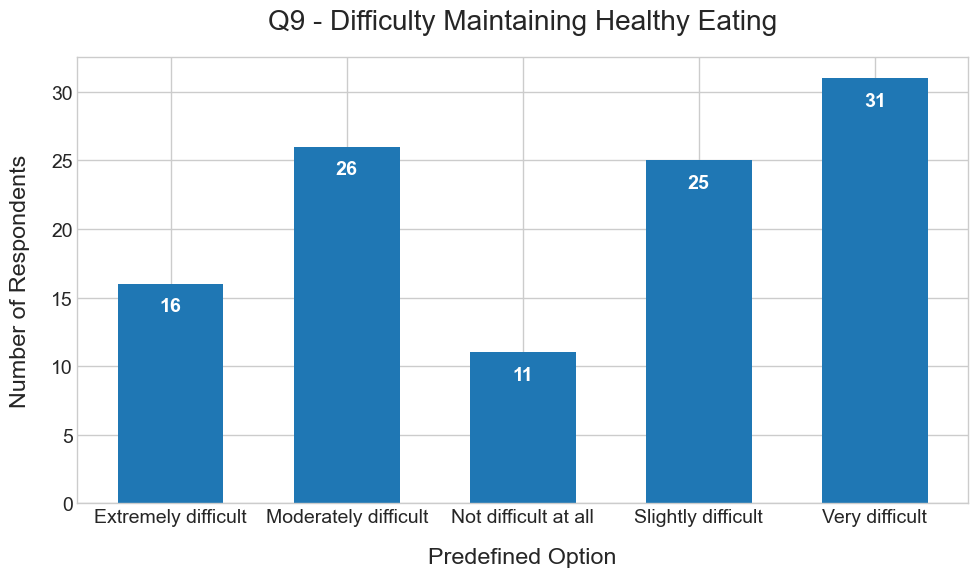

In [186]:
# Q9 - Difficulty Maintaining Healthy Eating (Likert Scale)
qid = 'Q9'

df[f'{qid}_labeled'] = df[qid].map(likert_maps[qid])

# Counts
counts = df[f'{qid}_labeled'].value_counts().sort_index()
percent = counts / len(df) * 100
likert_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(likert_results)
print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(likert_results.index, likert_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q9 - Difficulty Maintaining Healthy Eating', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(likert_results['Count']):
    plt.text(i, v - 2, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q14
-----------------------
                    Count    Percent
Q14                                 
Yes                    41  37.614679
Yes, significantly     30  27.522936
Only a bit             28  25.688073
Not at all             10   9.174312
-----------------------


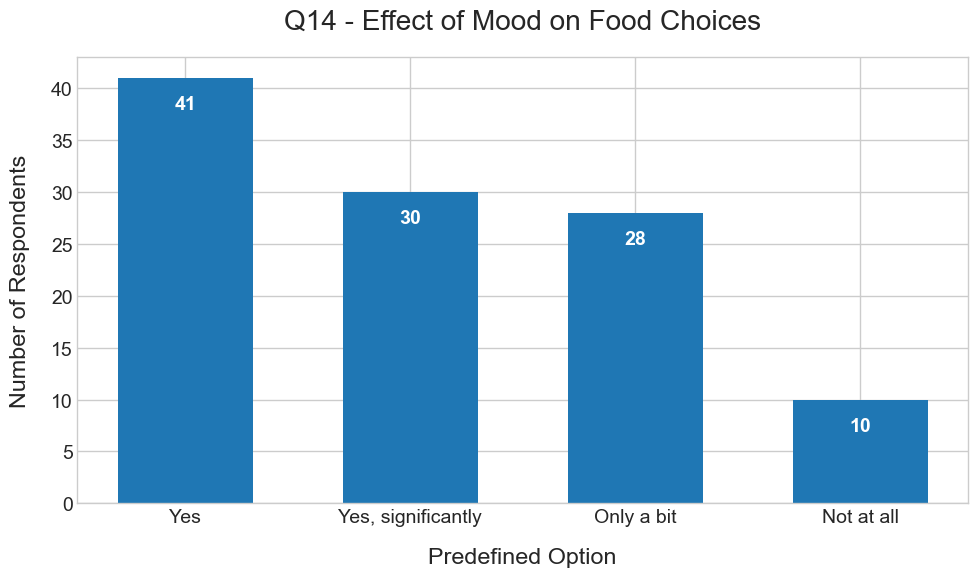

In [192]:
# Q14 - Effect of Mood on Food Choices (Multiple Choice)
qid = 'Q14'

filtered, others = process_multiple_choice(qid, official_options_map[qid])

# Counts
counts = filtered
percent = counts / counts.sum() * 100  # or len(df) for percentage of all 109 responses
mc_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(mc_results)
print("-----------------------")

if len(others) > 0:
    print("-----------------------")
    print(f"\nOther answers from {qid}:")
    for answer in others:
        print(answer)

    pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

    print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(mc_results.index, mc_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q14 - Effect of Mood on Food Choices', pad=20)
plt.xlabel('Predefined Option', labelpad=15)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=0, ha='center')

# Add values on bars
for i, v in enumerate(mc_results['Count']):
    plt.text(i, v - 3, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Quantitative results for Q8
-----------------------
                                   Count    Percent
I snack more often                    56  51.376147
I eat at irregular times              54  49.541284
I crave unhealthy or comfort food     51  46.788991
I skip meals                          35  32.110092
No major changes                      13  11.926606
I eat healthier to stay focused        5   4.587156
-----------------------

Other answers from Q8:
-----------------------
Less appetite
Binge Eating
I eat snacks as real meals 
I eat food that‘s much quicker to prepare and therefore often less healthy like frozen pizza or instant noodles
-----------------------


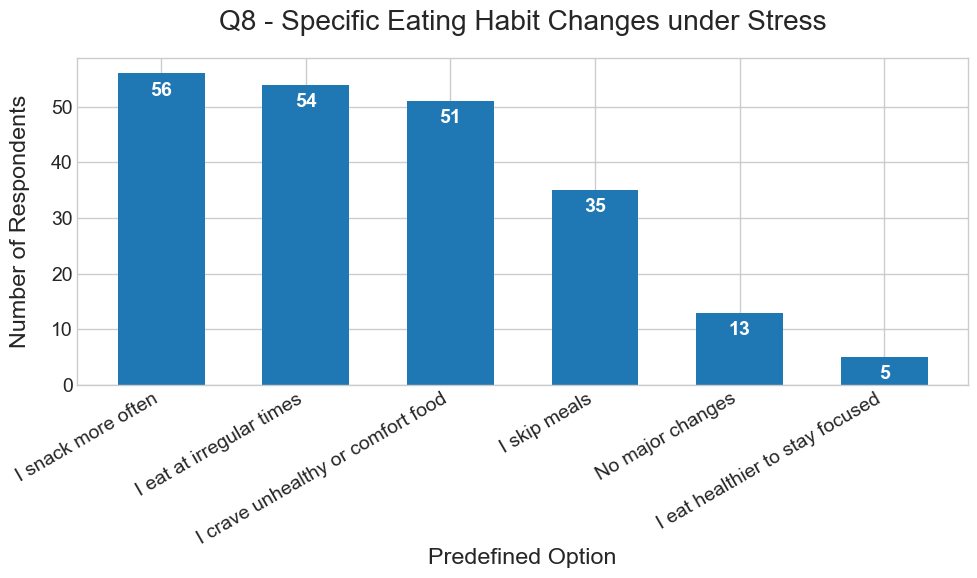

In [191]:
# Q8 - Specific Eating Habit Changes under Stress (Checkbox)
qid = 'Q8'

filtered, others = process_checkbox(qid, official_options_map[qid])

# Add dummies to the original DataFrame
df = pd.concat([df, filtered], axis=1)

# Counts
counts = filtered.sum().sort_values(ascending=False)
percent = counts / len(df) * 100
cb_results = pd.DataFrame({'Count': counts, 'Percent': percent})

print(f"Quantitative results for {qid}")
print("-----------------------")
print(cb_results)
print("-----------------------")

print(f"\nOther answers from {qid}:")
print("-----------------------")
for answer in others:
    print(answer)

pd.DataFrame({'Others:': list(others)}).to_csv(f'{qid}_others.csv', index=False)

print("-----------------------")

# Plot the results
plt.figure(figsize=(10,6))
plt.bar(cb_results.index, cb_results['Count'], width=0.6, color='#1f77b4')
plt.title('Q8 - Specific Eating Habit Changes under Stress', pad=20)
plt.xlabel('Predefined Option', labelpad=0)
plt.ylabel('Number of Respondents', labelpad=15)
plt.xticks(rotation=30, ha='right')

# Add values on bars
for i, v in enumerate(cb_results['Count']):
    plt.text(i, v - 4, str(v), ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
# -------- END -------- #

In [25]:
# Q21 - Stress Effect on Trust (Open-ended)

answers = df['Q21'].dropna().str.strip()
answers = answers[~answers.str.match(r'^[\.\,\-\/\s]*$')]

print(f"{len(answers)} responses for Q21")
print("Responses:")
for answer in answers.head(5):
    print("-", answer)

answers.to_csv("Q21_cleaned.csv", index=False)


61 responses for Q21
Responses:
- I have stopped using it, but not necessarily because it was complicated or tiring, rather because i lacked the motivation or didn't find it helpful nor appealing,. It tends to lack a human touch in my opinion, but a well trained app could make a huge difference
- Doesn't affect my trust at all
- Not at all
- Not at all.
- Not at all


Q9_labeled   Extremely difficult  Moderately difficult  Not difficult at all  \
Q1                                                                             
18 – 20                        1                     0                     1   
21 – 23                        2                     7                     1   
24 – 26                        8                    11                     5   
27 or older                    5                     8                     3   
Under 18                       0                     0                     1   

Q9_labeled   Slightly difficult  Very difficult  
Q1                                               
18 – 20                       2               4  
21 – 23                       9               5  
24 – 26                      11              13  
27 or older                   3               9  
Under 18                      0               0  
Q9_labeled   Extremely difficult  Moderately difficult  Not difficult at all  \
Q1       

<Axes: title={'center': 'Q1 vs Q9 - Difficulty Maintaining Healthy Eating by Age'}, xlabel='Q1'>

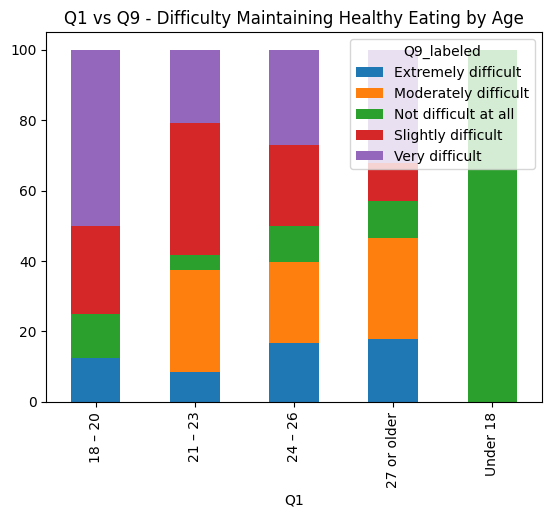

In [26]:
# Q1 vs Q9 - Difficulty Maintaining Healthy Eating by Age

cross = pd.crosstab(df['Q1'], df['Q9_labeled'])
print(cross)

# Optional: normalize to percentages
cross_pct = cross.div(cross.sum(axis=1), axis=0) * 100
print(cross_pct)

cross_pct.plot(kind='bar', stacked=True, title='Q1 vs Q9 - Difficulty Maintaining Healthy Eating by Age')


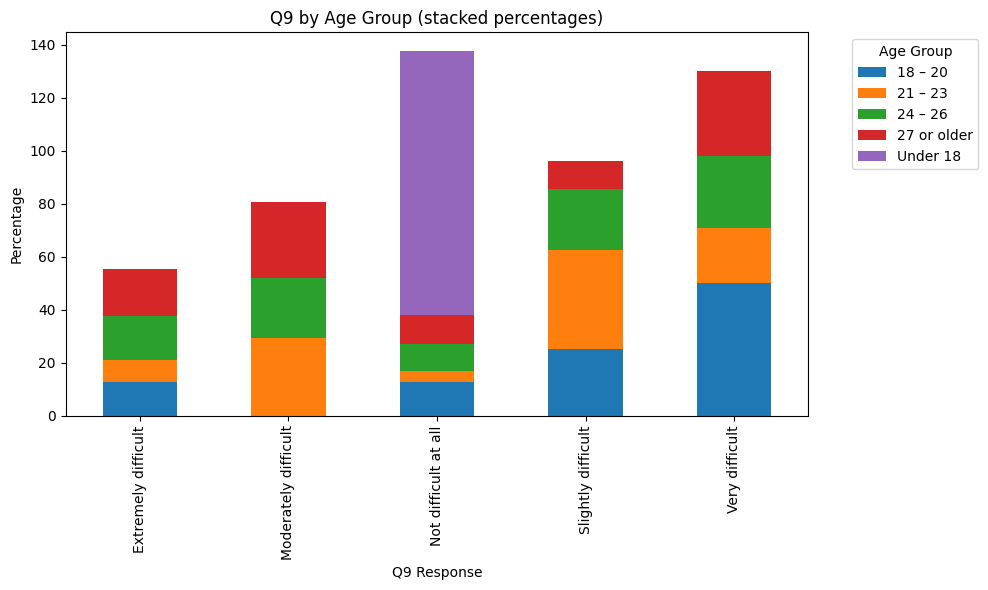

In [27]:
# Usable

cross_pct.T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Q9 by Age Group (stacked percentages)')
plt.ylabel('Percentage')
plt.xlabel('Q9 Response')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


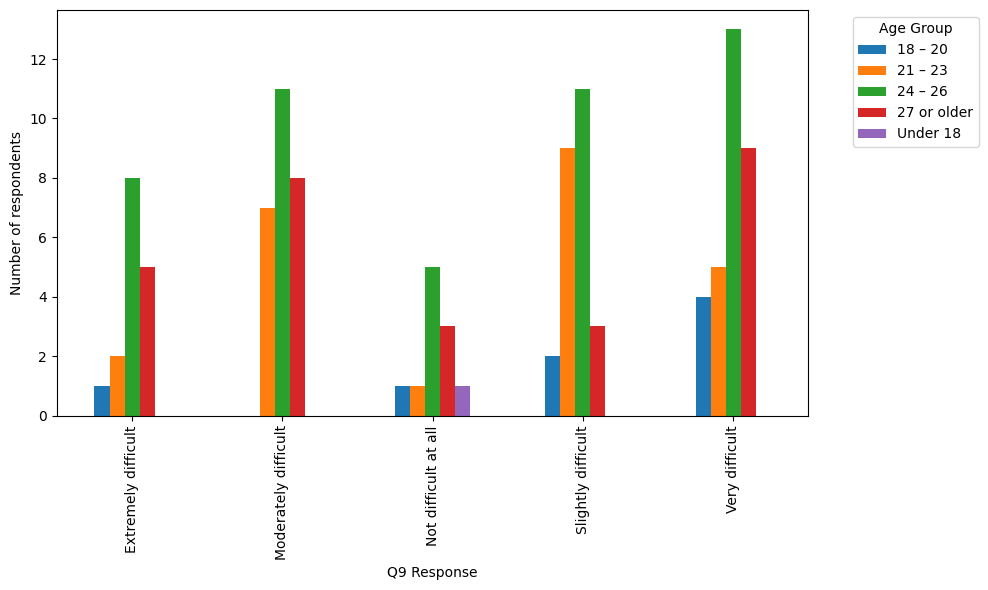

In [28]:
# Usable

cross.T.plot(kind='bar', figsize=(10,6))
plt.ylabel('Number of respondents')
plt.xlabel('Q9 Response')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


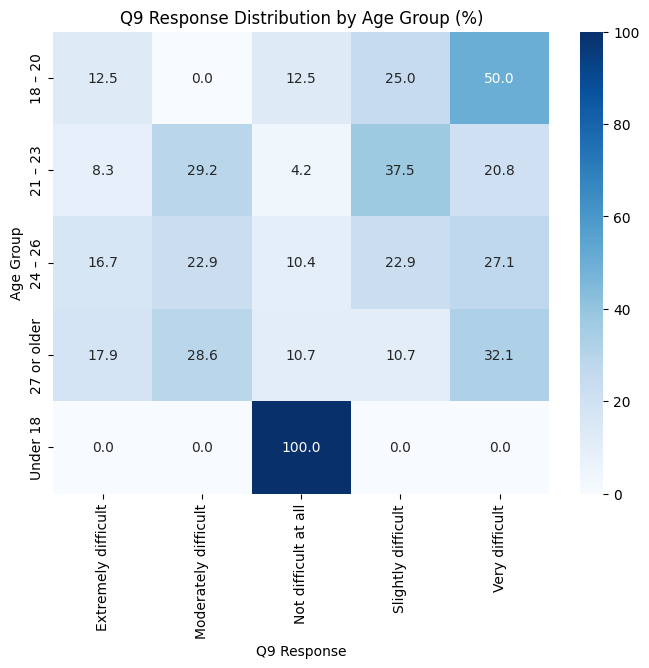

In [29]:
# Usable

plt.figure(figsize=(8,6))
sns.heatmap(cross_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title('Q9 Response Distribution by Age Group (%)')
plt.ylabel('Age Group')
plt.xlabel('Q9 Response')
plt.show()


In [32]:
# Slice columns starting from index 37
df_subset = df.iloc[:, 34:]

# Now get info for that subset
df_subset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Q35                                109 non-null    object
 1   Q36                                107 non-null    object
 2   Q37                                109 non-null    object
 3   Q38                                37 non-null     object
 4   Q9_labeled                         109 non-null    object
 5   I skip meals                       109 non-null    int64 
 6   I crave unhealthy or comfort food  109 non-null    int64 
 7   I snack more often                 109 non-null    int64 
 8   I eat at irregular times           109 non-null    int64 
 9   I eat healthier to stay focused    109 non-null    int64 
 10  No major changes                   109 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 9.5+ KB
